
### Scale-free network and the role of hubs
Goals for today:

-Make test-bed for running simulations (follow-up from last week)

-Write small world network creator (aka Barabasi model)

-Social isolation experiment (disconnect the most connected node: does it make a difference?)

-Write "delete edge" method

-Learn to find the most connected node

-Delete all edges from this node to all other nodes

-Make it a neat function that is easy to use

-Move our toolbox into a module

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A graph of 3 nodes:
0:[1]
1:[0, 2]
2:[1]

Nodes: [0, 1, 2]
Edges: [(0, 1), (1, 2)]


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


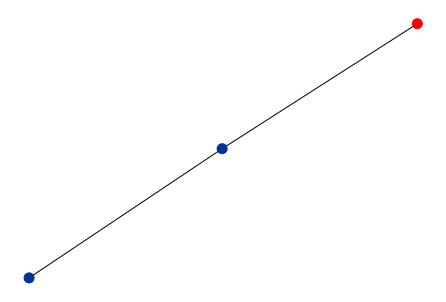

In [3]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.values = {} # 0 for healthy, 1 for sick
        
    def add_node(self, node, val=0):
        """If node is not in a dictionary, add it."""
        if node not in self.gdict:
            self.gdict[node] = []
        self.values[node] = val
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        # Add node2 as a connection for node1, and the other way around
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def get_nodes(self):
        """Returns a list of nodes."""
        return list(self.gdict.keys())
    
    def get_edges(self):
        """Returns a list of edges."""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.values[nodes[i]]==0:
                colors.append(BLUE)
            else:
                colors.append(RED)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)
    
# Test
g = Graph();
g.add_edge(0,1)
g.add_edge(1,2)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.values[0] = 1
g.plot();

In [4]:
def degrees(g):
    """Calculates degrees distribution and plots a histogram"""
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))

    #print(degrees)
    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    #print(hist)

    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist


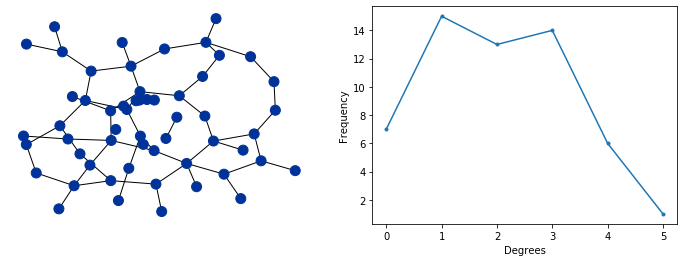

In [5]:
def random_network(n_nodes=7):
    n_edges = n_nodes

    g = Graph()
    for i in range(n_nodes):
        g.add_node(i)
    edges = []
    while len(edges)<n_edges:
        n1 = np.random.randint(low=0, high=n_nodes)
        n2 = np.random.randint(low=0, high=n_nodes)
        if n2<n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g
    
#print(g)

g = random_network(56)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot();
plt.subplot(122)
degrees_random = degrees(g)

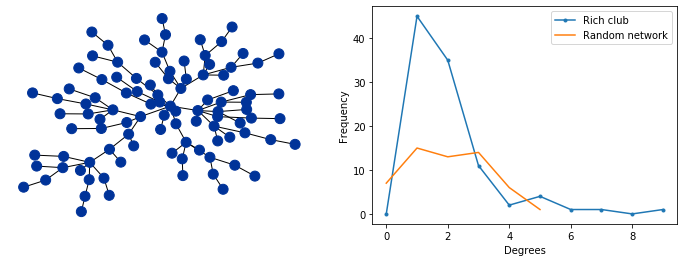

In [6]:
def rich_club_network(n_nodes=7):
    """An alternate way to create a random network."""
        g = Graph()
        for i in range(n_nodes):
            if i==0:
                g.add_node(0)
            else:
                g.add_edge(i, np.random.randint(low=0, high=i))
        return g

#print(g)

g = rich_club_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot();
plt.subplot(122)
degrees(g)
plt.plot(degrees_random)
plt.legend(["Rich club", "Random network"])

0 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [2. 2. 2. 0. 0. 0. 0. 0. 0. 0.]
3 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [3. 2. 3. 2. 0. 0. 0. 0. 0. 0.]
4 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [4. 2. 4. 2. 2. 0. 0. 0. 0. 0.]
5 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [5. 2. 4. 3. 2. 2. 0. 0. 0. 0.]
6 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [5. 2. 5. 4. 2. 2. 2. 0. 0. 0.]
7 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [5. 2. 5. 5. 2. 2. 3. 2. 0. 0.]
8 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [5. 2. 6. 6. 2. 2. 3. 2. 2. 0.]
9 Nodes: [0 1 2 3 4 5 6 7 8 9] Degrees: [5. 2. 7. 7. 2. 2. 3. 2. 2. 2.]


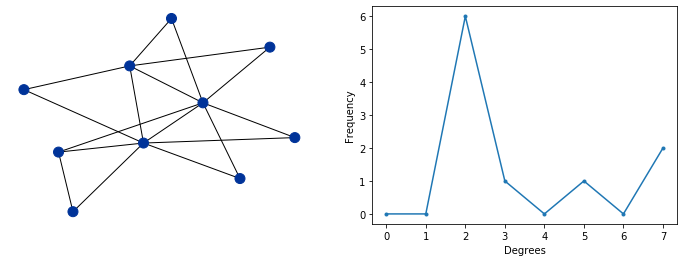

In [30]:
def barabasi(n_nodes=7):
    """Barabasi-Albert network creator. N_edges ~ 2*N_nodes."""
    g = Graph()
    degrees = np.zeros(n_nodes)    
    nodes = np.array(range(n_nodes))
    
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        elif i==1:
            g.add_edge(1,0)
            degrees[0] = 1
            degrees[1] = 1
        else:
            connections = np.random.choice(nodes[:i], size=2, replace=False, p=degrees[:i]/np.sum(degrees))
            for node in connections:
                g.add_edge(i, node)
                degrees[node] += 1
            degrees[i] = 2
        print(i,'Nodes:',nodes,'Degrees:',degrees)
    return g

g = barabasi(10)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
degrees(g);

General layout of the loop that will make propagation happen:

* For a certain number of time steps:
    * For every node that is sick (infectious):
        * For every healthy node connected to the sick one:
            * Based on probability, decide if this node will get sick

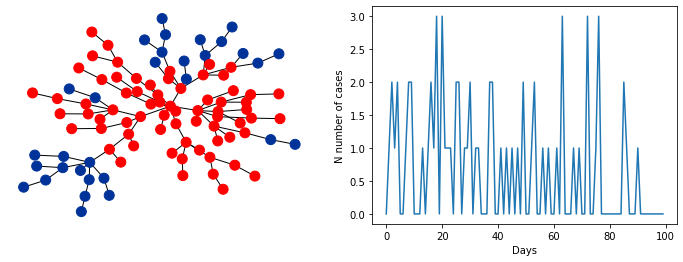

In [10]:
def pandemic (g, prob=0.5, nsteps=10):
    """Runs the pandemic for several steps."""
    nodes = g.get_nodes()
    # Set all nodes to healthy (only node 0 is sick):
    for node in g.get_nodes():
        g.values[node] = 0
    patient_zero = np.random.randint(low=0, high=len(nodes))
    g.values[patient_zero] = 1 # Just one node is sick
    
    g.values[0] = 1
    history = np.zeros(nsteps)
    
    # Start a time loop:
    for t in range(nsteps):
        newly_infected = []
        # Calculate which nodes will be infected:
        for node in g.get_nodes():
            if g.values[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.values[neighbor]==0 and np.random.uniform()<prob:
                        newly_infected.append(neighbor)
        # Infected nodes become sick:
        for node in newly_infected:
            g.values[node]=1
        # Show us new cases:
        history[t] = len(newly_infected)
    return history
        
history = pandemic(g, prob=0.05, nsteps=100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Days')
plt.ylabel('N number of cases');

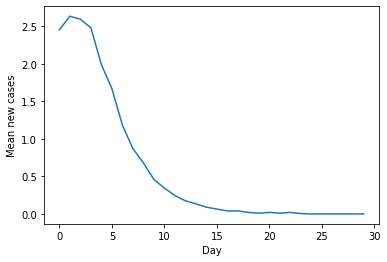

In [28]:
# Computational Experiment
N_STEPS = 30
N_TRIALS = 200
history = np.zeros(shape=(N_STEPS, N_TRIALS))

for i in range(N_TRIALS):
    g = rich_club_network(20)
    history[:,i] = pandemic(g, prob=0.5, nsteps=N_STEPS)

plt.plot(np.mean(history,axis=1));
plt.xlabel('Day');
plt.ylabel('Mean new cases');